# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the Dataset

Here we load the dataset and transforming the Date to index.

In [2]:
df = pd.read_csv(r"F:\mine\Air Quality\city_dayy.csv")
df["Date"]=df["Date"].apply(pd.to_datetime)
df.set_index("Date",inplace = True)
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2015-01-01,Ahmedabad,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
2015-01-02,Ahmedabad,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2015-01-03,Ahmedabad,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
2015-01-04,Ahmedabad,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
2015-01-05,Ahmedabad,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [3]:
city= df.corr()
city['AQI'].sort_values(ascending=True)

Benzene    0.044407
Xylene     0.165532
O3         0.198991
NH3        0.252019
Toluene    0.279992
NO         0.452191
NOx        0.486450
SO2        0.490586
NO2        0.537071
PM2.5      0.659181
CO         0.683346
PM10       0.803313
AQI        1.000000
Name: AQI, dtype: float64

In [4]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 29531 entries, 2015-01-01 to 2020-07-01
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   PM2.5       24933 non-null  float64
 2   PM10        18391 non-null  float64
 3   NO          25949 non-null  float64
 4   NO2         25946 non-null  float64
 5   NOx         25346 non-null  float64
 6   NH3         19203 non-null  float64
 7   CO          27472 non-null  float64
 8   SO2         25677 non-null  float64
 9   O3          25509 non-null  float64
 10  Benzene     23908 non-null  float64
 11  Toluene     21490 non-null  float64
 12  Xylene      11422 non-null  float64
 13  AQI         24850 non-null  float64
 14  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(2)
memory usage: 3.6+ MB


# counting nan values

Here we are counting the nan values and then filling up the nan values.

In [6]:
a=(df.isnull().sum()/df.shape[0]*100).sort_values()
a

City           0.000000
CO             6.972334
NO            12.129626
NO2           12.139785
SO2           13.050692
O3            13.619586
NOx           14.171549
PM2.5         15.570079
AQI           15.851139
AQI_Bucket    15.851139
Benzene       19.041008
Toluene       27.229014
NH3           34.973418
PM10          37.723071
Xylene        61.322001
dtype: float64

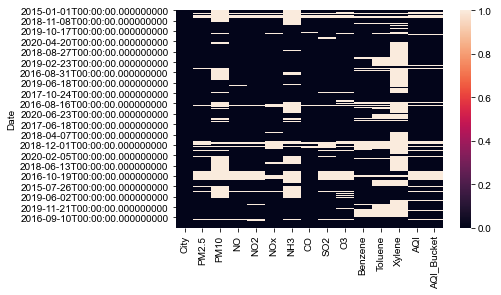

In [7]:
sns.heatmap(df.isnull())
sns.set(rc={'figure.figsize':(14,7)})

In [8]:
df['NO2'].fillna(df['NO2'].median(),inplace=True)
df['PM2.5'].fillna(df['PM2.5'].mean(),inplace=True)
df['PM10'].fillna(df['PM10'].mean(),inplace=True)
df['Toluene'].fillna(df['Toluene'].median(),inplace=True)
#df['Benzene'].fillna(df['Benzene'].median(),inplace=True)
df['NH3'].fillna(df['NH3'].mean(),inplace=True)
df['O3'].fillna(df['O3'].median(),inplace=True)
df['SO2'].fillna(df['SO2'].median(),inplace=True)
df['CO'].fillna(df['CO'].median(),inplace=True)
df['NO'].fillna(df['NO'].median(),inplace=True)
df['NOx'].fillna(df['NOx'].median(),inplace=True)

In [9]:
df.isnull().sum()

City              0
PM2.5             0
PM10              0
NO                0
NO2               0
NOx               0
NH3               0
CO                0
SO2               0
O3                0
Benzene        5623
Toluene           0
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

'Xylene' have more than 60% of the nan vales and benzene has 0 correlation with AQI,so here drop this coloum.

In [10]:
df=df.drop(['Xylene','Benzene'],axis=1)

Here's we have our filtered data and a plot showing nan values.

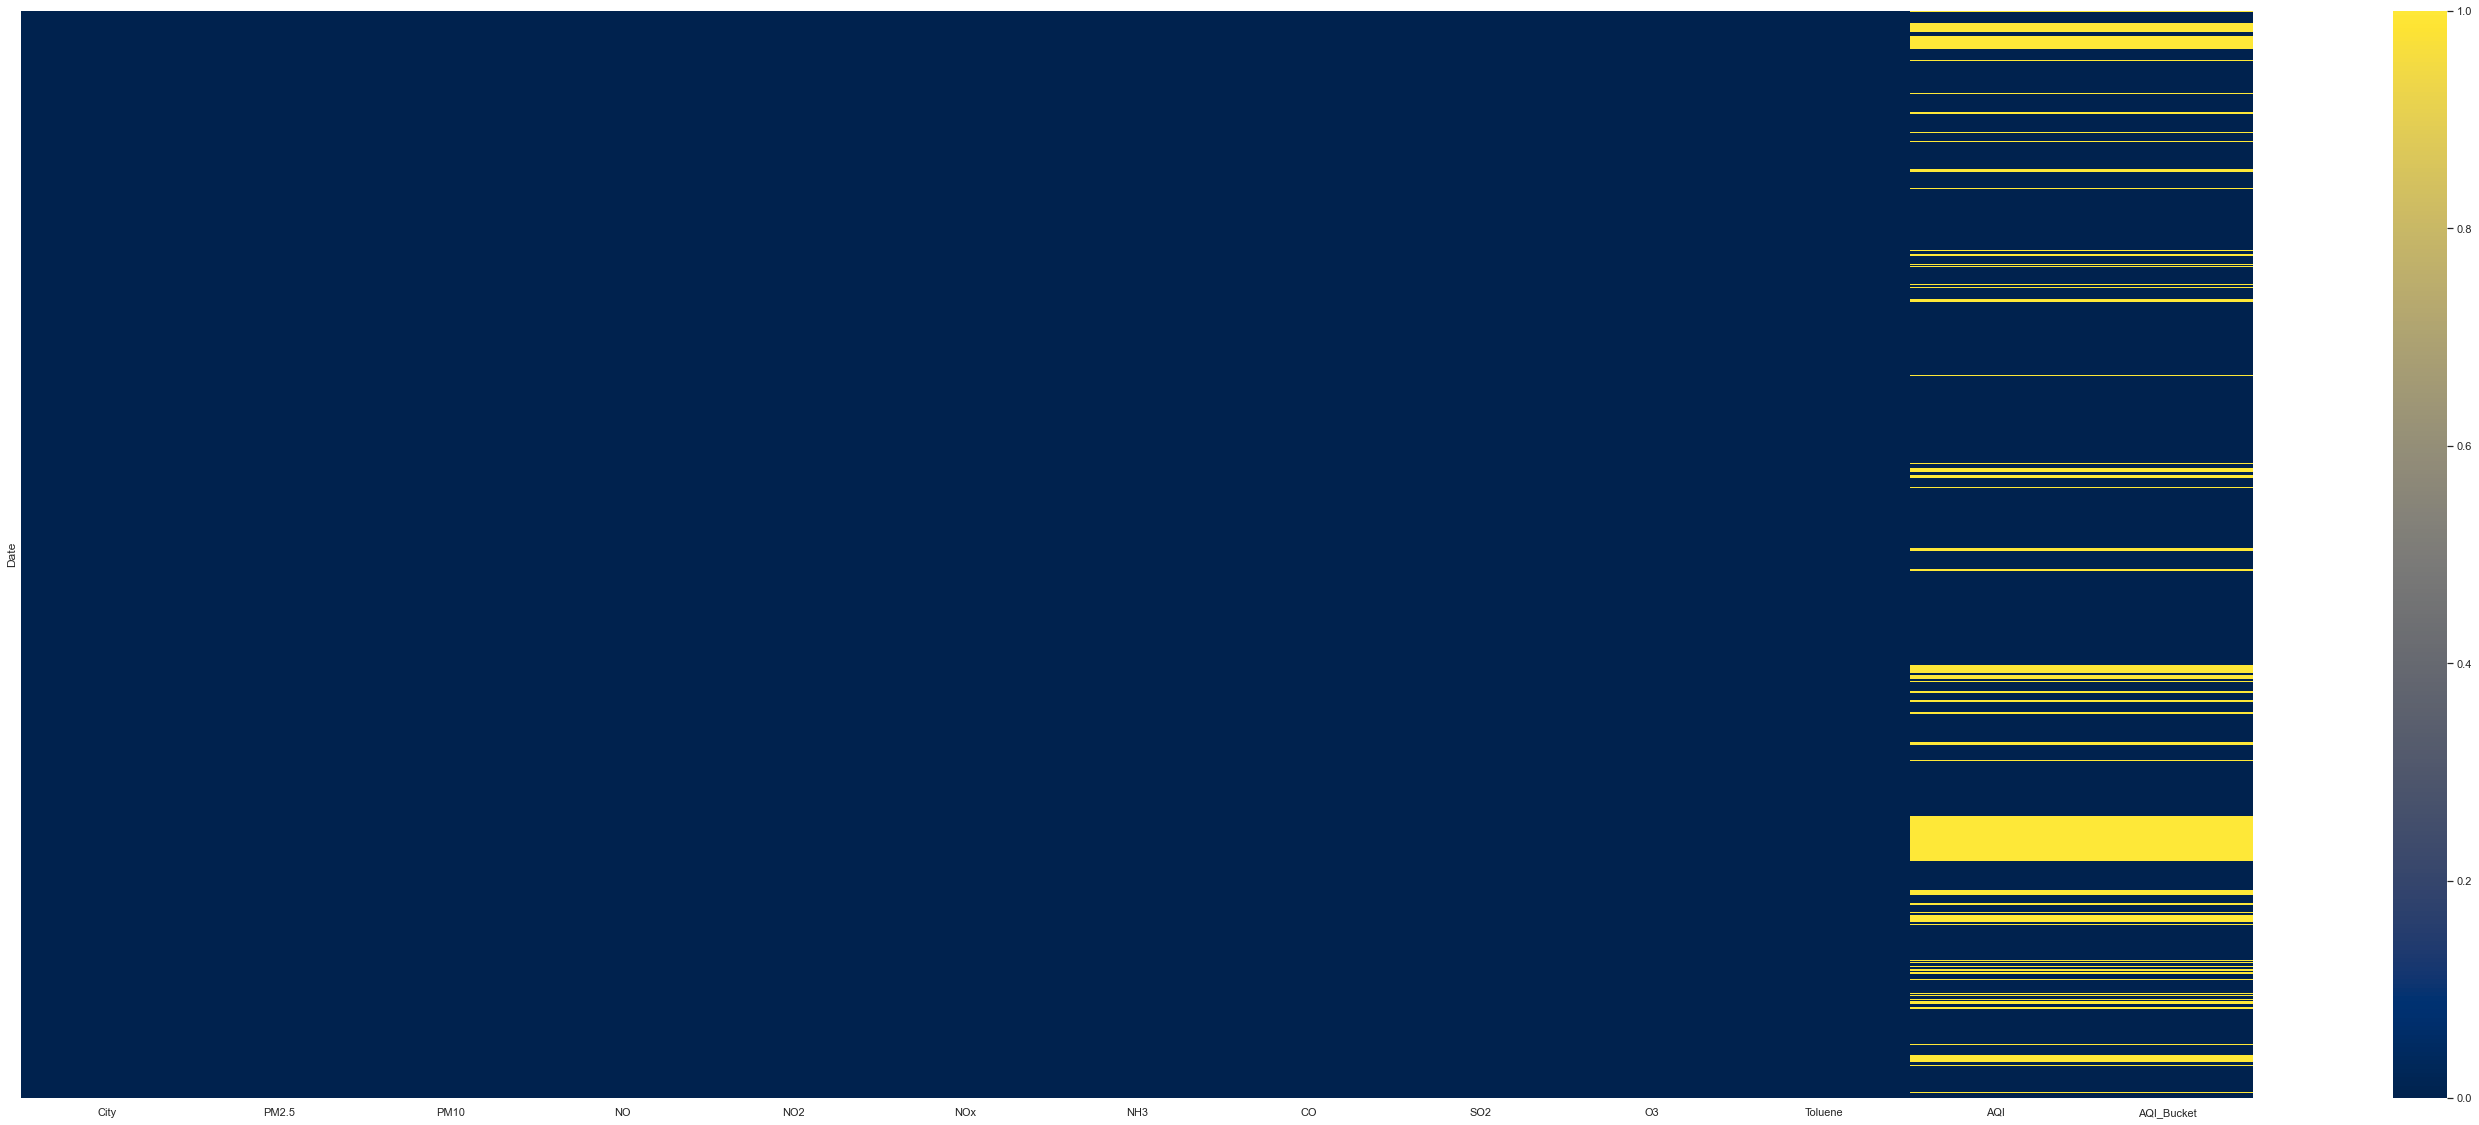

In [11]:
plt.figure(figsize = (50,20))
sns.heatmap(df.isnull(), yticklabels=False,cmap = 'cividis')
plt.show()

In [12]:
city= df.corr()
city['AQI'].sort_values(ascending=True)

NH3        0.139687
O3         0.194327
Toluene    0.280328
NO         0.452233
NOx        0.470915
SO2        0.485029
PM10       0.499126
NO2        0.535813
PM2.5      0.654743
CO         0.678071
AQI        1.000000
Name: AQI, dtype: float64

The upper plot showing that dataset have no nan values execpt "AQi" & "AQI_Bucket".

Now with the Mean values of the pollutants we are calculating our "AQI".

In [13]:
df["AQI"] = df["AQI"].fillna(round(df[['PM10','PM2.5','NOx','SO2','O3','CO','Toluene','NO','NO2','NH3']].median(axis = 1)))

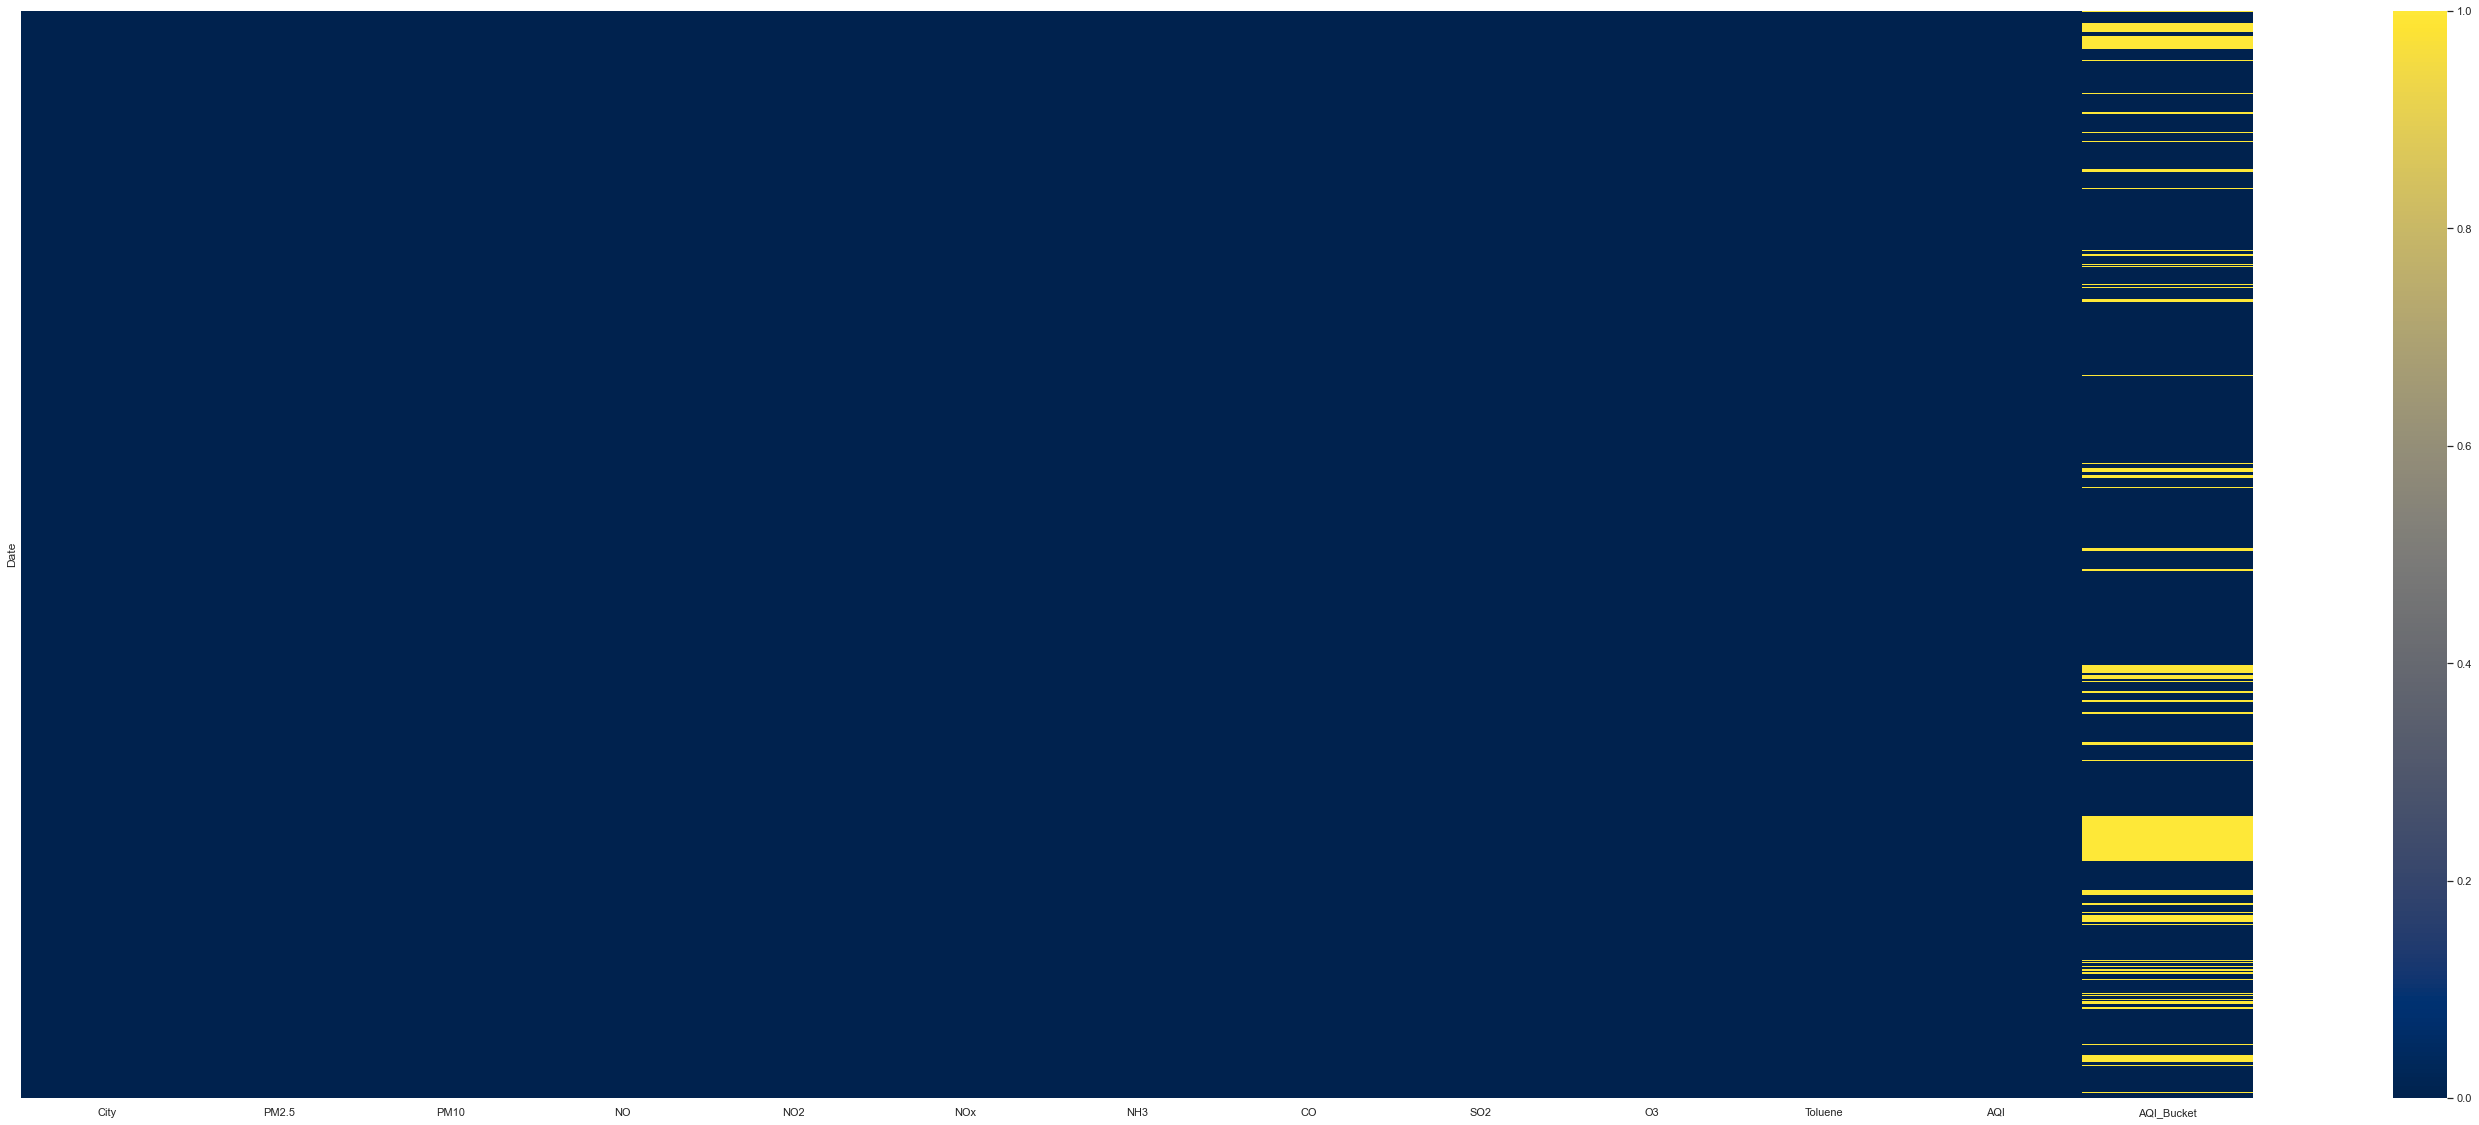

In [14]:
plt.figure(figsize = (50,20))
sns.heatmap(df.isnull(), yticklabels=False,cmap = 'cividis')
plt.show()

# Filling up of "AQI_Bucket" with Def() function.

In [15]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'
    
df["AQI_Bucket"] = df["AQI_Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))

In [20]:
df['AQI_Bucket'] = df['AQI_Bucket'].replace({'Moderate':3,'Poor':4,'Very Poor':5,'Satisfactory':2,'Good':1,'Severe':6})
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Toluene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,
2015-01-01,Ahmedabad,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.02,21.0,1
2015-01-02,Ahmedabad,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,5.50,20.0,1
2015-01-03,Ahmedabad,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,16.40,26.0,1
2015-01-04,Ahmedabad,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,10.14,19.0,1
2015-01-05,Ahmedabad,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,18.89,31.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,Visakhapatnam,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,12.07,41.0,1
2020-06-28,Visakhapatnam,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,2.21,70.0,2
2020-06-29,Visakhapatnam,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,68.0,2


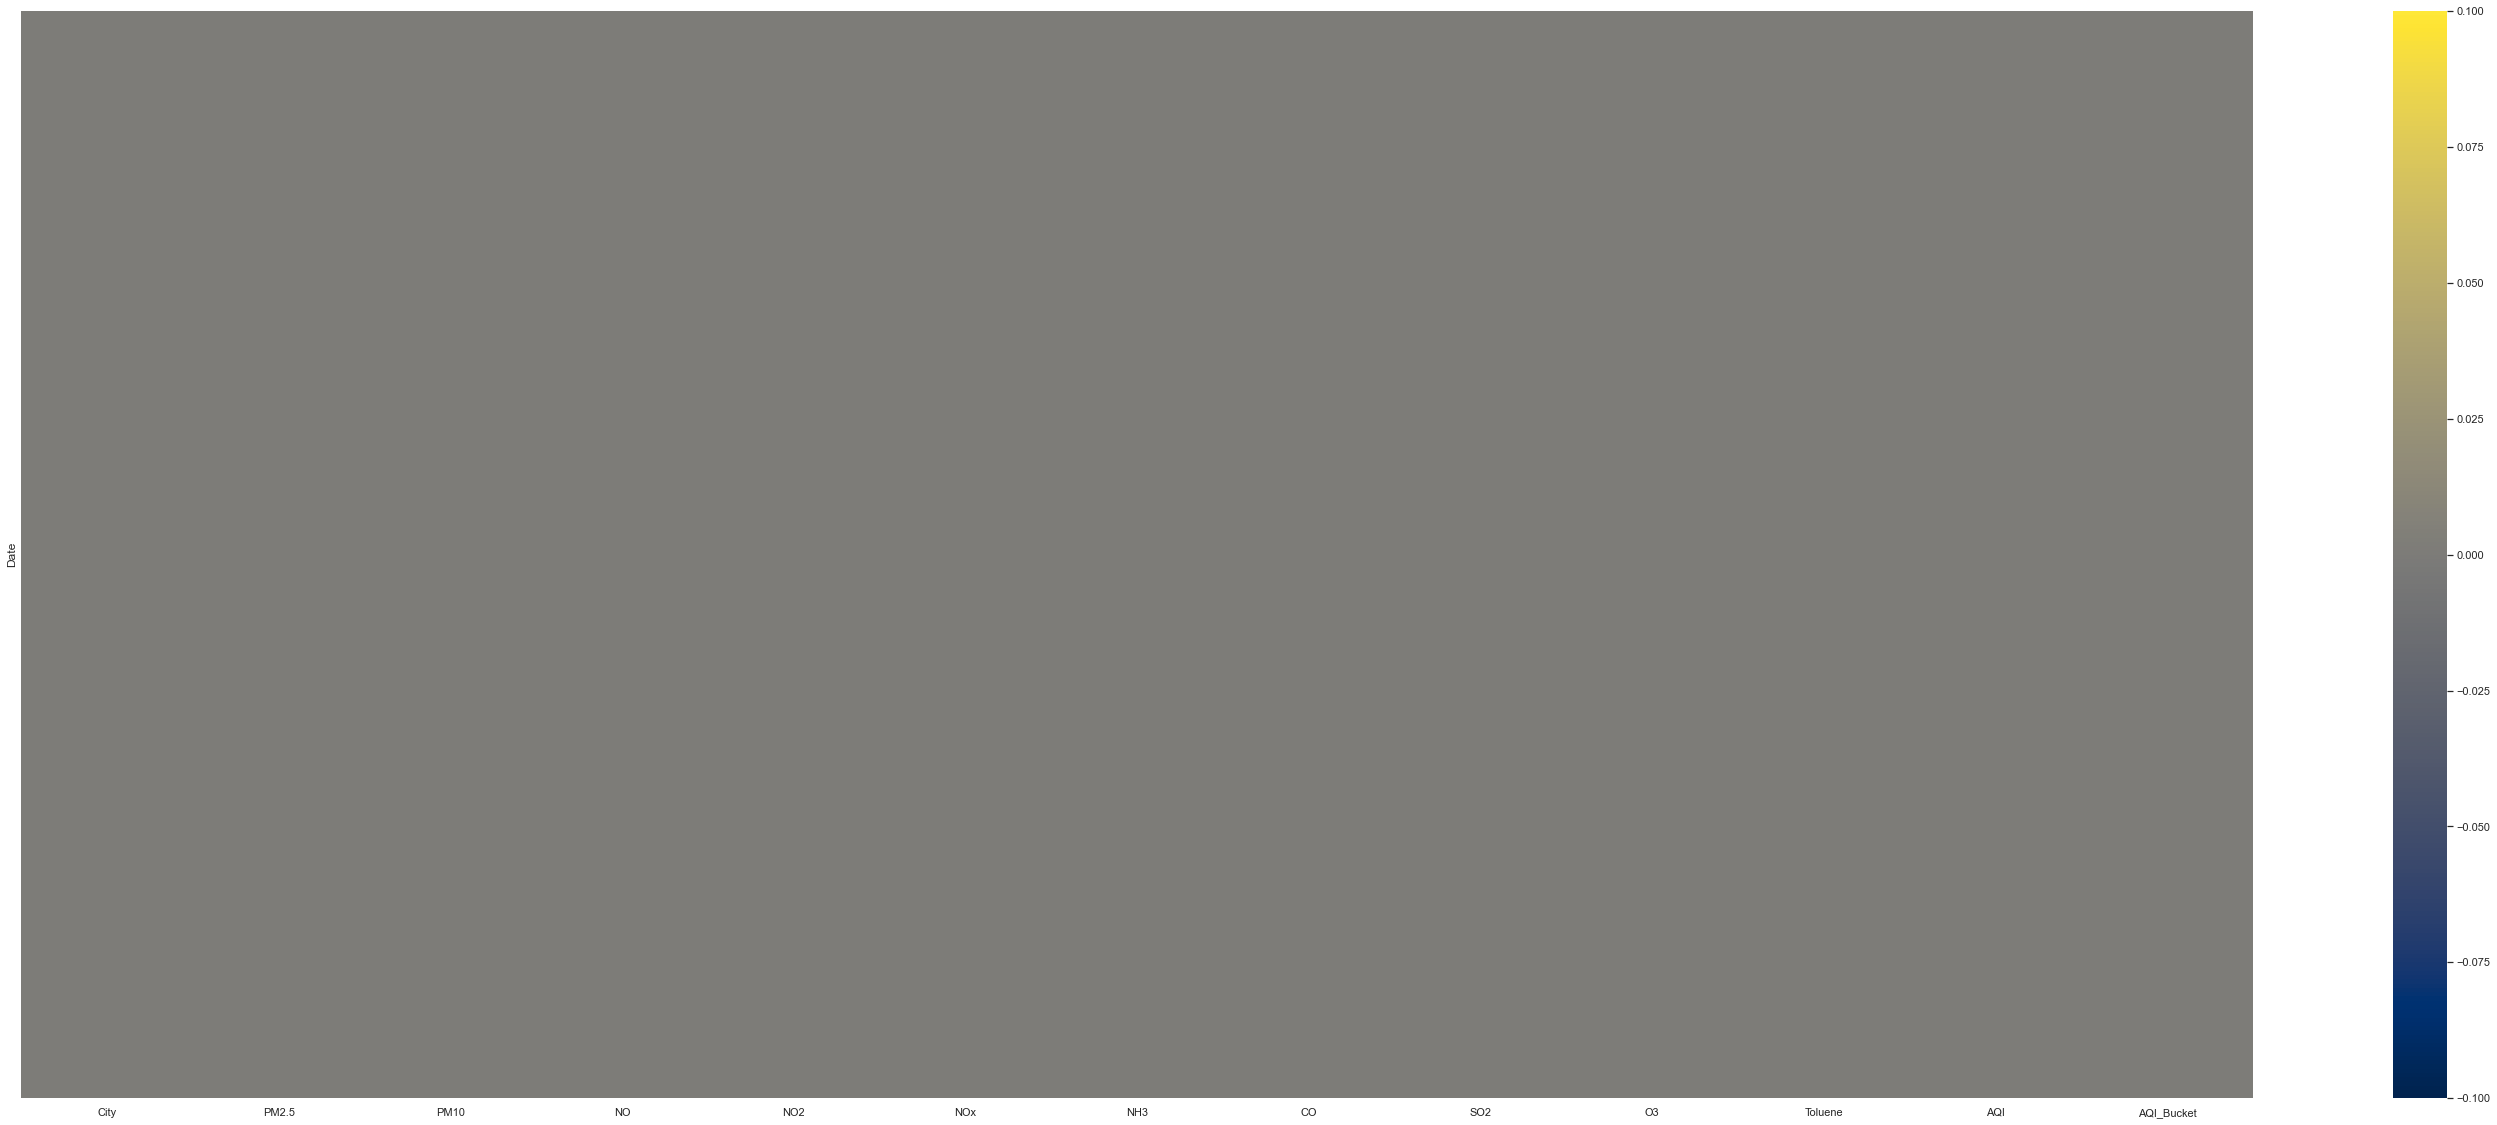

In [21]:
plt.figure(figsize = (50,20))
sns.heatmap(df.isnull(), yticklabels=False,cmap = 'cividis')
plt.show()

Here we are Checking which City have highest "AQI" level

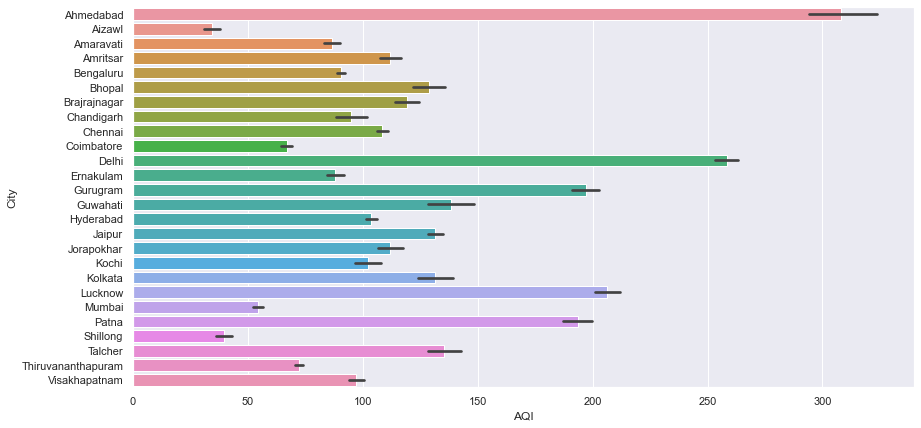

In [22]:
sns.barplot(x="AQI",y="City",data=df)
sns.set(rc={"figure.figsize":(14,8)})


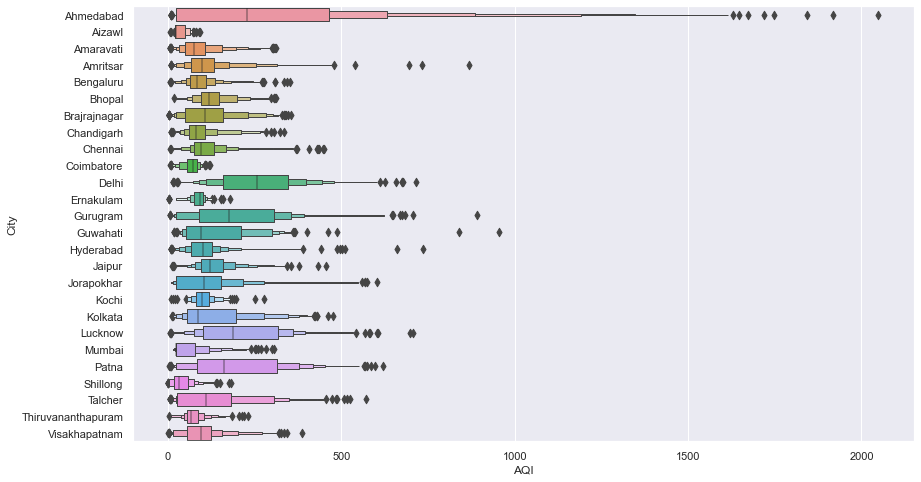

In [23]:
sns.boxenplot(x="AQI",y="City",data=df)
sns.set(rc={"figure.figsize":(14,8)})

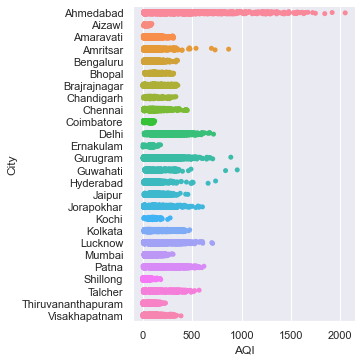

In [24]:
sns.catplot(x="AQI",y="City",data=df)
sns.set(rc={"figure.figsize":(15,8)})

Here we have graphical representation, that how pollutant spreads in cities.

<AxesSubplot:xlabel='PM2.5', ylabel='City'>

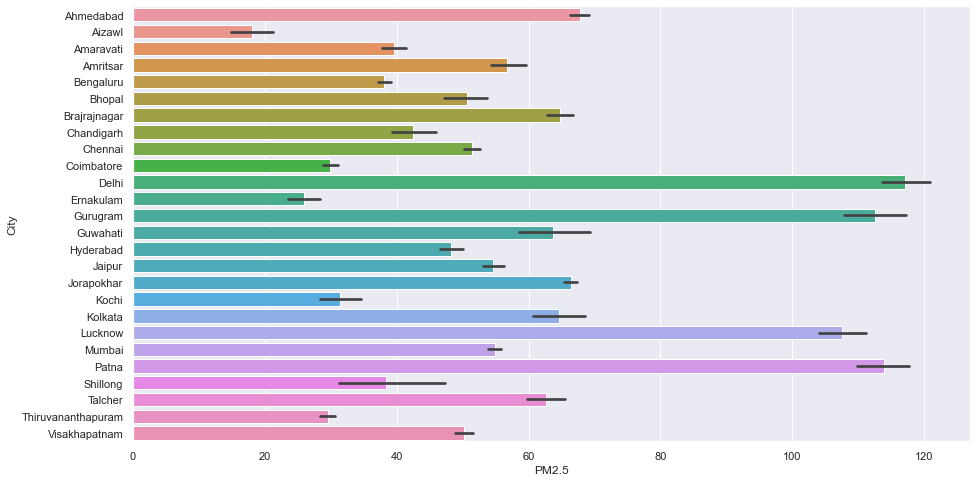

In [25]:
sns.barplot(data=df, x="PM2.5", y="City")

<AxesSubplot:xlabel='PM10', ylabel='City'>

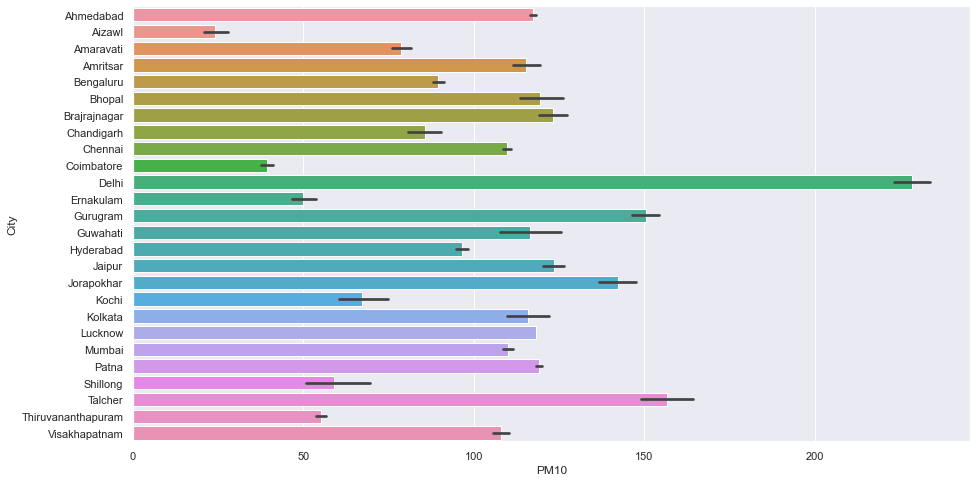

In [26]:
sns.barplot(data=df, x="PM10", y="City")

<AxesSubplot:xlabel='NO', ylabel='City'>

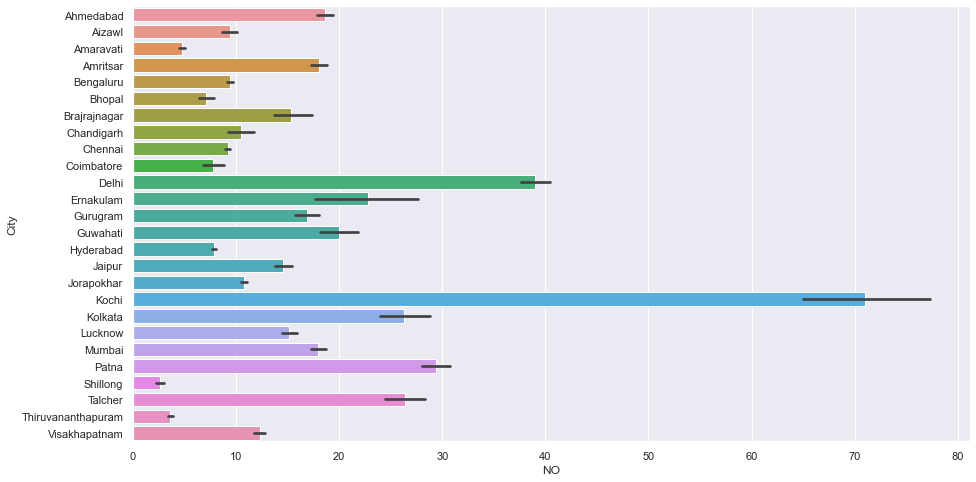

In [27]:
sns.barplot(data=df, x="NO", y="City")

<AxesSubplot:xlabel='NO2', ylabel='City'>

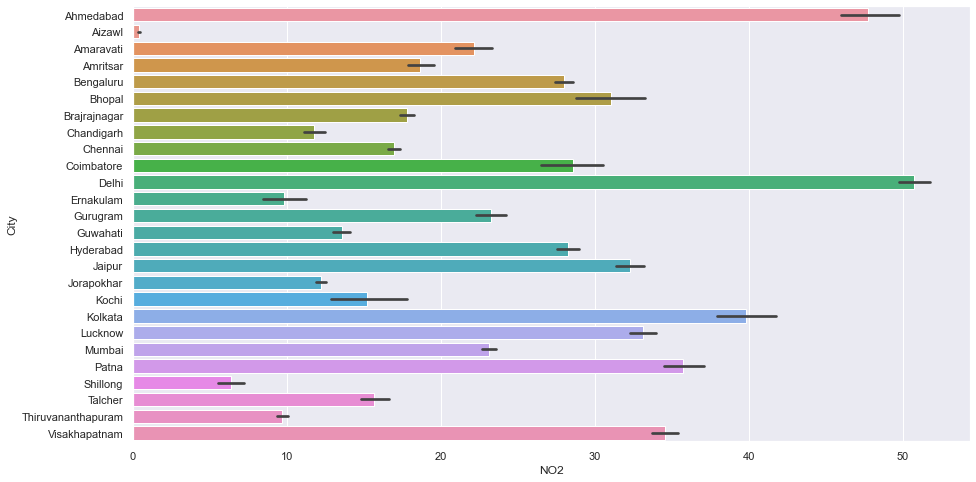

In [28]:
sns.barplot(data=df, x="NO2", y="City")

<AxesSubplot:xlabel='NOx', ylabel='City'>

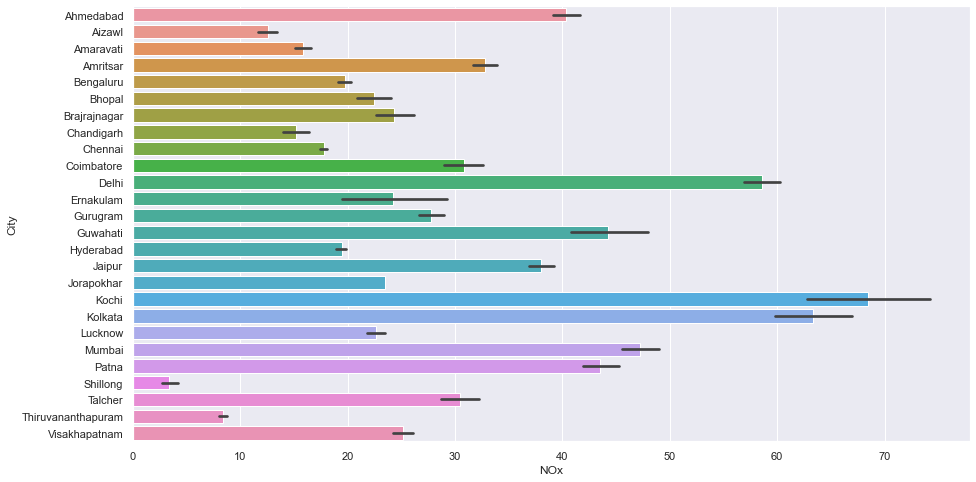

In [29]:
sns.barplot(data=df, x="NOx", y="City")

<AxesSubplot:xlabel='NH3', ylabel='City'>

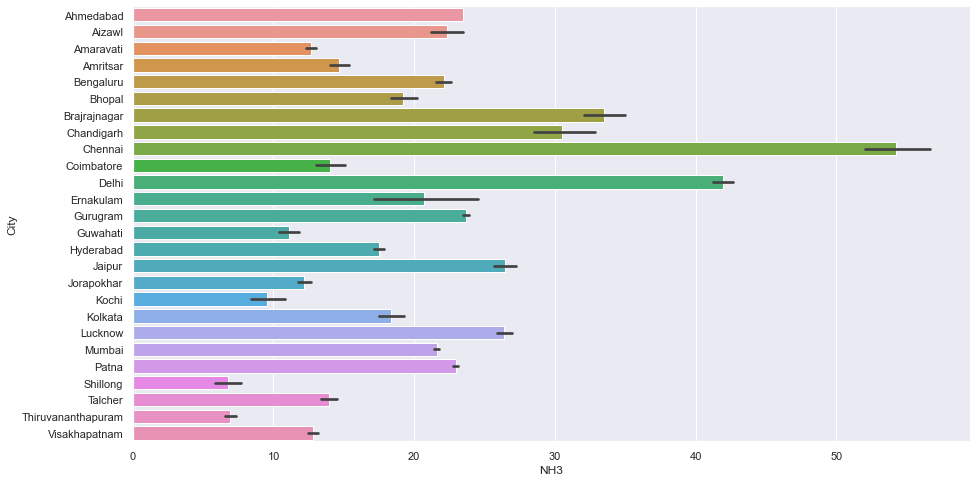

In [30]:
sns.barplot(data=df, x="NH3", y="City")

<AxesSubplot:xlabel='SO2', ylabel='City'>

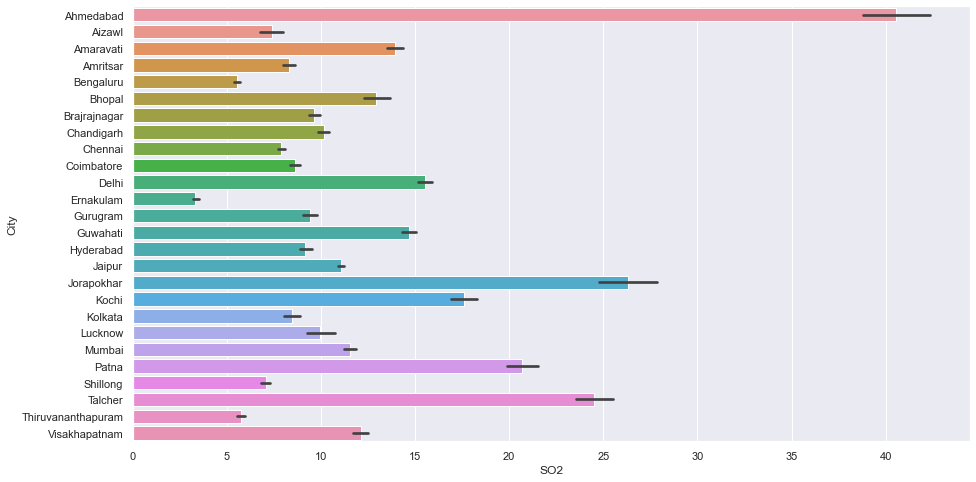

In [31]:
sns.barplot(data=df, x="SO2", y="City")

<AxesSubplot:xlabel='O3', ylabel='City'>

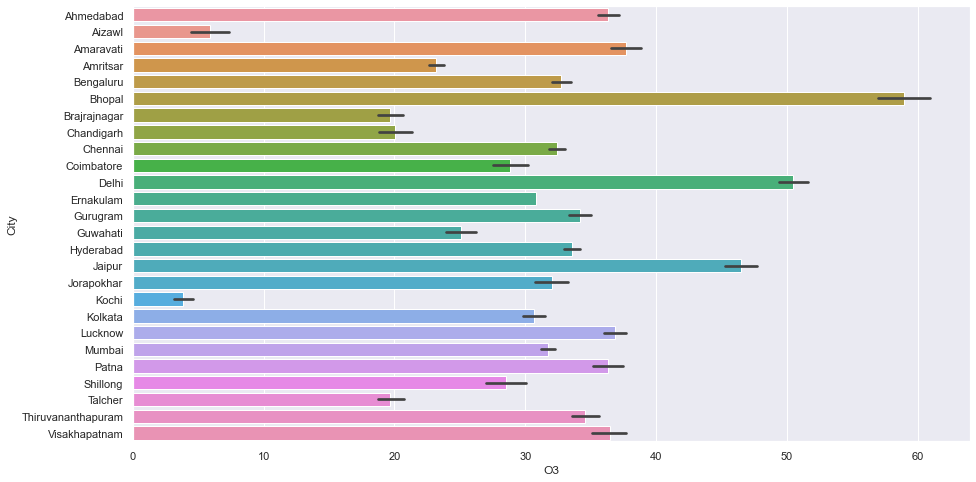

In [32]:
sns.barplot(data=df, x="O3", y="City")

<AxesSubplot:xlabel='Toluene', ylabel='City'>

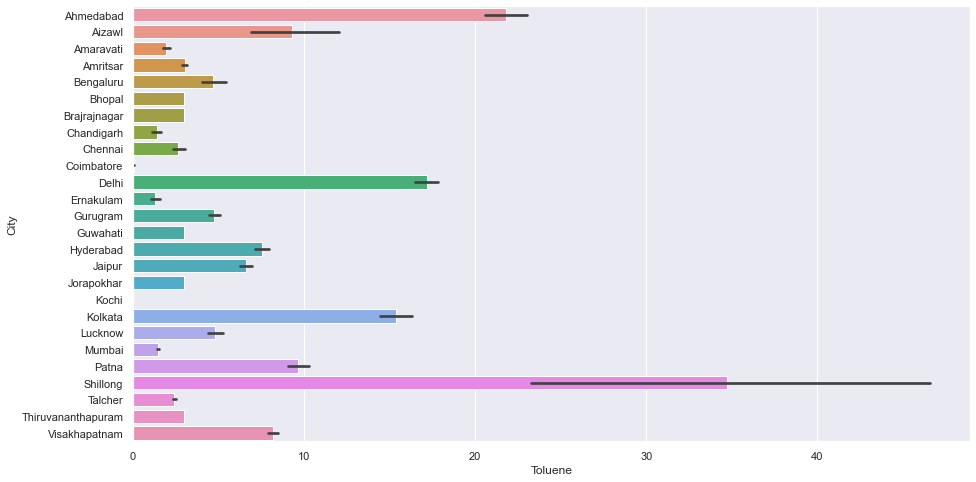

In [34]:
sns.barplot(data=df, x="Toluene", y="City")

In [35]:
df['AQI_Bucket'].value_counts()

3    8829
2    8242
1    6004
4    2781
5    2337
6    1338
Name: AQI_Bucket, dtype: int64

In [36]:
df.isnull().sum()

City          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

In [37]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['City']= label_encoder.fit_transform(df['City'])

In [38]:
df

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Toluene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,
2015-01-01,0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.02,21.0,1
2015-01-02,0,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,5.50,20.0,1
2015-01-03,0,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,16.40,26.0,1
2015-01-04,0,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,10.14,19.0,1
2015-01-05,0,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,18.89,31.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-27,25,15.020000,50.940000,7.68,25.06,19.54,12.470000,0.47,8.55,23.30,12.07,41.0,1
2020-06-28,25,24.380000,74.090000,3.42,26.06,16.53,11.990000,0.52,12.72,30.14,2.21,70.0,2
2020-06-29,25,22.910000,65.730000,3.45,29.53,18.33,10.710000,0.48,8.42,30.96,0.01,68.0,2


In [39]:
X=df[['PM10','PM2.5','NOx','SO2','O3','CO','Toluene','NO','NO2','NH3']]
y= df['AQI_Bucket']

In [40]:
y

Date
2015-01-01    1
2015-01-02    1
2015-01-03    1
2015-01-04    1
2015-01-05    1
             ..
2020-06-27    1
2020-06-28    2
2020-06-29    2
2020-06-30    2
2020-07-01    1
Name: AQI_Bucket, Length: 29531, dtype: int64

In [41]:
X

,PM10,PM2.5,NOx,SO2,O3,CO,Toluene,NO,NO2,NH3
Date,,,,,,,,,,
2015-01-01,118.127103,67.450578,17.15,27.64,133.36,0.92,0.02,0.92,18.22,23.483476
2015-01-02,118.127103,67.450578,16.46,24.55,34.06,0.97,5.50,0.97,15.69,23.483476
2015-01-03,118.127103,67.450578,29.70,29.07,30.70,17.40,16.40,17.40,19.30,23.483476
2015-01-04,118.127103,67.450578,17.97,18.59,36.08,1.70,10.14,1.70,18.48,23.483476
2015-01-05,118.127103,67.450578,37.76,39.33,39.31,22.10,18.89,22.10,21.42,23.483476
...,...,...,...,...,...,...,...,...,...,...
2020-06-27,50.940000,15.020000,19.54,8.55,23.30,0.47,12.07,7.68,25.06,12.470000
2020-06-28,74.090000,24.380000,16.53,12.72,30.14,0.52,2.21,3.42,26.06,11.990000
2020-06-29,65.730000,22.910000,18.33,8.42,30.96,0.48,0.01,3.45,29.53,10.710000


In [42]:
X1=df[['AQI_Bucket']]
y1=df[['AQI']]

# checking the AQI status

In [44]:
dicty1 = {'Moderate':3,'Poor':4,'Very Poor':5,'Satisfactory':2,'Good':1,'Severe':6}
dict2 = {k:v for v,k in dicty1.items()}
dict2
df['Bucket'] = df['AQI_Bucket'].map(dict2)
df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Toluene,AQI,AQI_Bucket,Bucket
Date,,,,,,,,,,,,,,
2015-01-01,0,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.02,21.0,1,Good
2015-01-02,0,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,5.50,20.0,1,Good
2015-01-03,0,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,16.40,26.0,1,Good
2015-01-04,0,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,10.14,19.0,1,Good
2015-01-05,0,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,18.89,31.0,1,Good


In [45]:
df[df['AQI']==int(input('enter--->'))]['Bucket'].unique()

enter--->255


array(['Poor'], dtype=object)

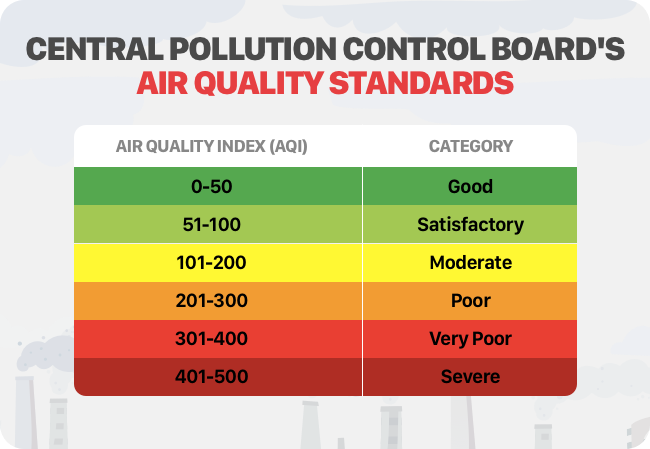

In [43]:
from PIL import Image
img  = Image.open(r"F:\mine\Air Quality\Airquality.png")
img

# DecisionTreeRegressor

In [46]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=.2)

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
df_p = Pipeline([
    ('sscaler',StandardScaler())
])

In [48]:
pipe= df_p.fit_transform(X)
pipe

array([[-3.18006285e-15, -4.78371477e-15, -4.72010410e-01, ...,
        -7.31089939e-01, -4.12430271e-01,  1.71537368e-16],
       [-3.18006285e-15, -4.78371477e-15, -4.95418293e-01, ...,
        -7.28764974e-01, -5.22190989e-01,  1.71537368e-16],
       [-3.18006285e-15, -4.78371477e-15, -4.62583346e-02, ...,
         3.52185400e-02, -3.65575893e-01,  1.71537368e-16],
       ...,
       [-7.32829252e-01, -7.49671378e-01, -4.31979538e-01, ...,
        -6.13446708e-01,  7.82391837e-02, -6.16747830e-01],
       [-9.53249626e-01, -8.55203003e-01, -4.16035038e-01, ...,
        -5.85547128e-01,  6.65255893e-02, -6.49580594e-01],
       [-7.29053015e-01, -8.82806171e-01, -5.77176262e-01, ...,
        -7.55269576e-01, -3.80290867e-02, -8.82789786e-01]])

In [49]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=50,
    min_samples_split=100,
    min_samples_leaf=20,
    
    random_state=42,
    max_leaf_nodes=100,)
model.fit(train_X,train_y)

DecisionTreeClassifier(max_depth=50, max_leaf_nodes=100, min_samples_leaf=20,
                       min_samples_split=100, random_state=42)

In [52]:
model.score(train_X, train_y)*100
model.score(test_X, test_y)*100

78.11071609954293

In [53]:
from sklearn.metrics import mean_squared_error
pre= model.predict(train_X)
mse=mean_squared_error(pre, train_y)
rmse = np.sqrt(mse)
mse

0.34181341009143246

In [54]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model,train_X, train_y, scoring='neg_mean_squared_error',cv=10 )
rmse_score = np.sqrt(-score)
rmse_score.mean()

0.6056769347417817

# Random_Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth=5,random_state=42,min_samples_leaf=7,n_estimators=100,
)

In [59]:
rf.fit(train_X,train_y)

RandomForestClassifier(max_depth=5, min_samples_leaf=7, random_state=42)

In [60]:
y_pred_r = rf.predict(test_X)


In [61]:
rf.score(test_X,test_y)*100

74.18317250719485

In [62]:
from sklearn.metrics import mean_squared_error
import math

mse=mean_squared_error(test_y,y_pred_r)
mse

0.4780768579651261

In [63]:
RMSE = math.sqrt(mse)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

0.6914310218417496


# Kn_Regressor

In [64]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(train_X,train_y)

KNeighborsClassifier()

In [65]:
predct=knn.predict(test_X)
knn.score(train_X,train_y)*100

82.36539112766678

In [66]:
print('My predicted values',predct)
print('My actual values', test_y)
knn.score(test_X,test_y)*100

My predicted values [3 6 2 ... 2 2 5]
My actual values Date
2016-04-11    3
2018-02-21    6
2019-09-23    2
2017-05-06    3
2017-06-21    3
             ..
2020-04-08    2
2016-08-07    2
2017-07-06    2
2019-07-06    2
2017-04-08    6
Name: AQI_Bucket, Length: 5907, dtype: int64


76.01151176570171

In [67]:
# Gradient boosting Classifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
xgbmodel = XGBClassifier(learning_rate =0.15,n_estimators=100,
max_depth=5,
min_child_weight=3,
 gamma=0.1,
 colsample_bytree=0.7)
xgbmodel.fit(train_X, train_y)

C:\Users\harpreet soni\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:03:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, gamma=0.1, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=5,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=2, num_parallel_tree=1,
              objective='multi:softprob', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
xgbmodel.predict(test_X)
print('train',xgbmodel.score(train_X,train_y)*100)
print('testing',xgbmodel.score(test_X,test_y)*100)

train 85.59515746698273
testing 80.63314711359403


# Time_Series_analysis

In [70]:
X1

,AQI_Bucket
Date,
2015-01-01,1
2015-01-02,1
2015-01-03,1
2015-01-04,1
2015-01-05,1
...,...
2020-06-27,1
2020-06-28,2
2020-06-29,2


In [71]:
y1.head()

,AQI
Date,
2015-01-01,21.0
2015-01-02,20.0
2015-01-03,26.0
2015-01-04,19.0
2015-01-05,31.0


In [72]:
df=y1.resample(rule='MS').sum()#

In [73]:
df.shape

(67, 1)

<AxesSubplot:xlabel='Date'>

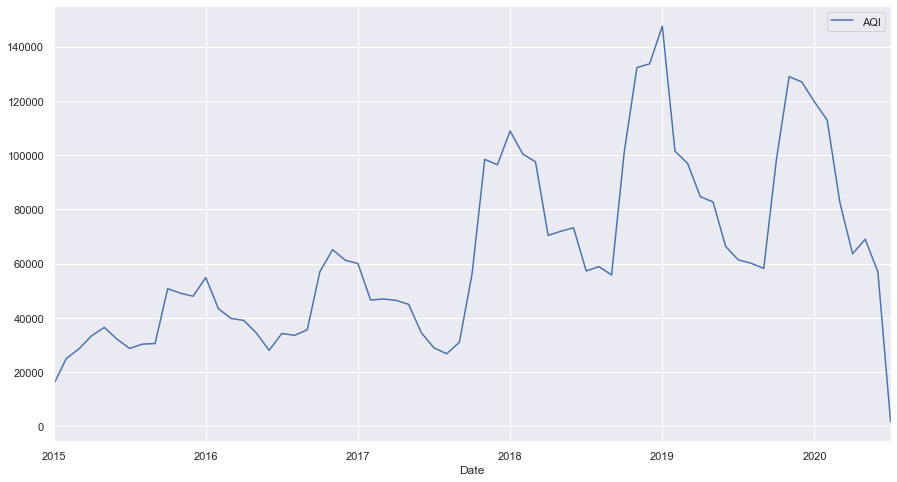

In [74]:
df.plot()

# Seasonal_decomposing

In [75]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

<ipython-input-76-1669ed5057f3>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  seasonal_decompose(df,model=' mul',freq=7).plot();


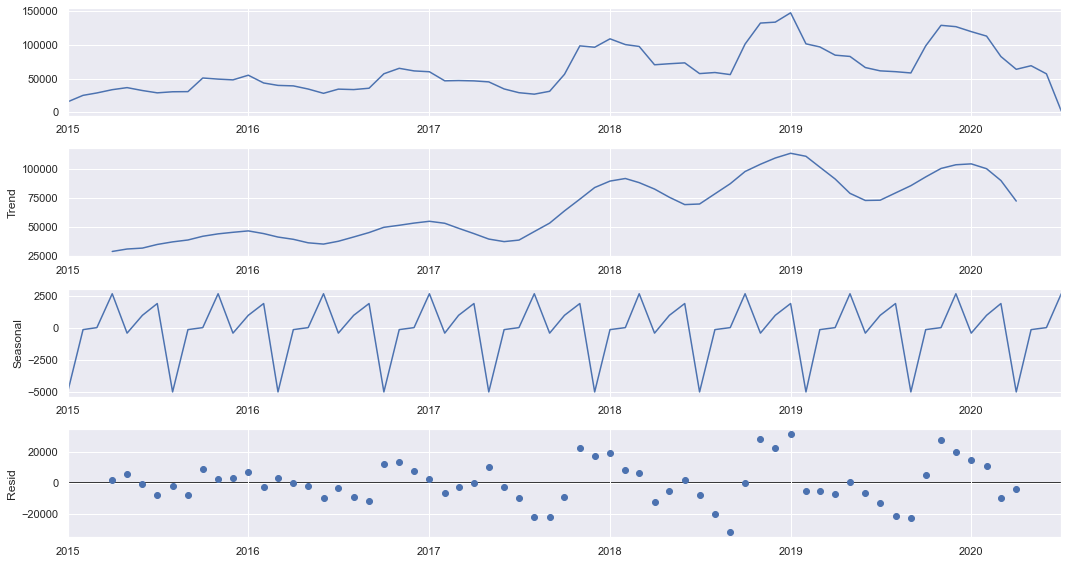

In [76]:
seasonal_decompose(df,model=' mul',freq=7).plot();
                   

In [77]:
train=df[:52]
test=df[52:]

# Exponential_Smoothing

In [78]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [79]:
hwmodel=ExponentialSmoothing(train.AQI,trend='add', seasonal='mul', seasonal_periods=12).fit()

C:\Users\harpreet soni\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\harpreet soni\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [80]:
test_pred=hwmodel.forecast(25)

<AxesSubplot:xlabel='Date'>

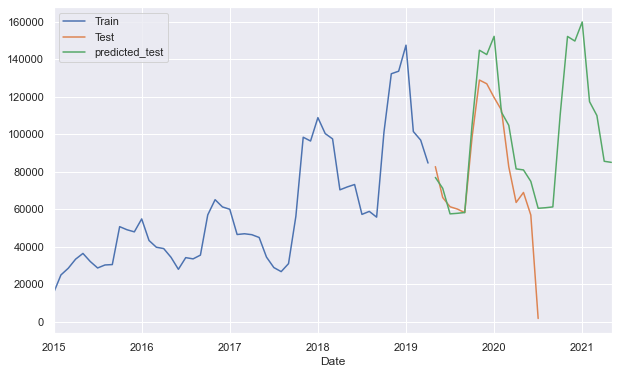

In [81]:
train['AQI'].plot(legend=True, label='Train', figsize=(10,6))
test['AQI'].plot(legend=True, label='Test')

test_pred.plot(legend=True, label='predicted_test')

In [82]:
final_model=ExponentialSmoothing(df.AQI,trend='mul', seasonal='add', seasonal_periods=12).fit()

C:\Users\harpreet soni\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\harpreet soni\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [83]:
pred=final_model.forecast(30)
pred=final_model.forecast(30)

In [84]:
pred.head(3)

2020-08-01    35880.330672
2020-09-01    34058.233112
2020-10-01    75038.660425
Freq: MS, dtype: float64

<AxesSubplot:xlabel='Date'>

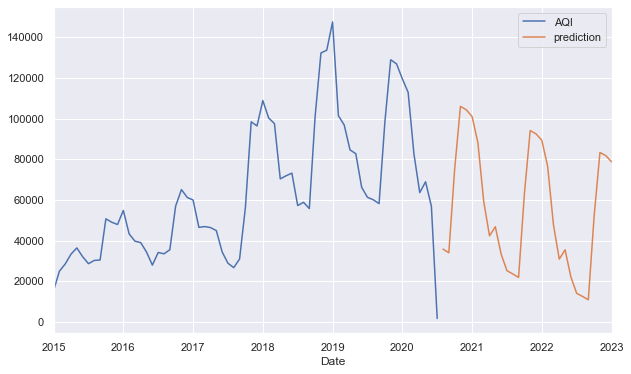

In [85]:
df['AQI'].plot(legend=True, label='AQI', figsize=(10,6))
pred.plot(legend=True, label='prediction')

# Sarimax

In [86]:
#from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm

In [ ]:
model=sm.tsa.statespace.SARIMAX(df['AQI'],order=(2, 2, 2),seasonal_order=(1,2,2,12))
results=model.fit()

C:\Users\harpreet soni\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:865: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [ ]:
df['forecast']=results.predict(start=50,end=100,dynamic=True)
df[['AQI','forecast']].plot(figsize=(12,8))

# DateOffSet

In [ ]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [ ]:
future_df=pd.concat([df,future_datest_df])

In [ ]:
future_df['forecast'] = results.predict(start = 66, end = 100, dynamic= True)  
future_df[['AQI', 'forecast']].plot(figsize=(12, 8)) 

# Future forecasting

In [ ]:
future_df

In [ ]:
future_df
df.plot()
sns.set(rc={'figure.figsize':(14,9)})